# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release (update once every 45 days on average), and developer mode.

## Latest stable release

This will install the last stable release that was published by our teams on pypi. It is expected to provide a clean and non-buggy experience for all users.

In [1]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]

  Using cached python_doctr-0.6.0-py3-none-any.whl (239 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached mplcursors-0.5.2.tar.gz (89 kB)
  Preparing metadata (setup.py) ... done
  Using cached Unidecode-1.3.6-py3-none-any.whl (235 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 6.8 MB/s eta 0:00:0000:0100:01
  Using cached langdetect-1.0.9.tar.g

## From source

Before being staged for a stable release, we constantly iterate on the community feedback to improve the library. Bug fixes and performance improvements are regularly pushed to the project Git repository. Using this installation method, you will access all the latest features that have not yet made their way to a pypi release!

In [2]:
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[tf]
# PyTorch
#!pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]

Now go to  `Runtime/Restart runtime` for your changes to take effect!

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [3]:
# Install some free fonts for result rendering
#!sudo apt-get install fonts-freefont-ttf -y

Let's take care of all the imports directly

In [5]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [9]:
# Read the file
doc = DocumentFile.from_images("/home/said/courses/Projetinfo/sports_scr/data/natation/000004.png")

In [10]:
doc[0].shape

(720, 1280, 3)

docTR is, under the hood, running Deep Learning models to perform the different tasks it supports. Those models were built and trained with very popular frameworks for maximum compatibility (you will be pleased to know that you can switch from [PyTorch](https://pytorch.org/) to [TensorFlow](https://www.tensorflow.org/) without noticing any difference for you). By default, our high-level API sets the best default values so that you get high performing models without having to know anything about it. All of this is wrapper in a `Predictor` object, which will take care of pre-processing, model inference and post-processing for you ⚡

Let's instantiate one!

In [11]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True, export_as_straight_boxes=True)

/home/said/anaconda3/envs/openmmlab/lib/python3.8/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/said/anaconda3/envs/openmmlab/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


By default, PyTorch model provides a nice visual description of a model, which is handy when it comes to debugging or knowing what you just created. We also added a similar feature for TensorFlow backend so that you don't miss on this nice assistance.

Let's dive into this model 🕵

In [12]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear')
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): Ba

Here we are inspecting the most complex (and high-level) object of docTR API: an OCR predictor. Since docTR achieves Optical Character Recognition by first localizing textual elements (Text Detection), then extracting the corresponding text from each location (Text Recognition), the OCR Predictor wraps two sub-predictors: one for text detection, and the other for text recognition.

## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [13]:
result = predictor(doc)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

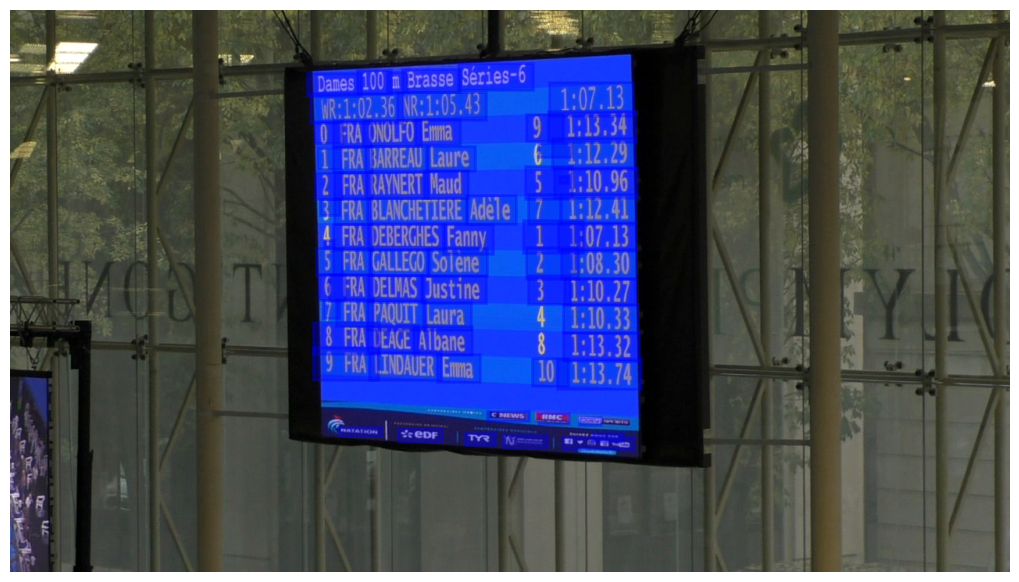

In [14]:
result.show(doc)

Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

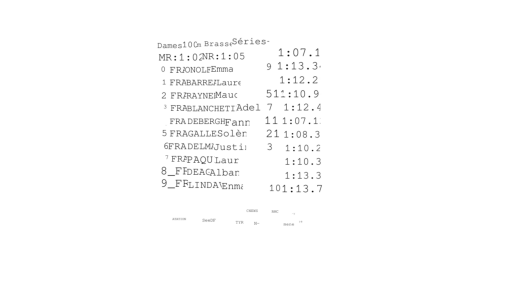

In [15]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [16]:
# JSON export
json_export = result.export()
#print(json_export)

In [17]:
import pandas as pd

In [18]:
out = json_export['pages'][0]
blocks = out["blocks"]

In [19]:
data = blocks[2]
data

{'geometry': ((0.3095703125, 0.328125), (0.6259765625, 0.4345703125)),
 'lines': [{'geometry': ((0.3095703125, 0.328125),
    (0.6259765625, 0.380859375)),
   'words': [{'value': '3',
     'confidence': 0.9970589876174927,
     'geometry': ((0.3095703125, 0.3359375), (0.330078125, 0.3642578125))},
    {'value': 'FRA',
     'confidence': 0.9960910677909851,
     'geometry': ((0.3232421875, 0.333984375), (0.3603515625, 0.380859375))},
    {'value': 'BLANCHETIERE',
     'confidence': 0.955119252204895,
     'geometry': ((0.3564453125, 0.3349609375), (0.45703125, 0.37890625))},
    {'value': 'Adele',
     'confidence': 0.5407153367996216,
     'geometry': ((0.4560546875, 0.3291015625), (0.505859375, 0.3798828125))},
    {'value': '7',
     'confidence': 0.9982878565788269,
     'geometry': ((0.517578125, 0.328125), (0.5498046875, 0.380859375))},
    {'value': '1:12.41',
     'confidence': 0.9964113831520081,
     'geometry': ((0.55078125, 0.328125), (0.6259765625, 0.380859375))}]},
  {'geo

In [20]:
list_words = []
list_confidences = []
list_geometries = []
for block in blocks:
    # Extract the words and values
    words = []
    confidences = []
    geometries = []

    for line in block['lines']:
        for word in line['words']:
            words.append(word['value'])
            confidences.append(word['confidence'])
            geometries.append(word['geometry'])
    
    list_words.append(words)
    list_confidences.append(confidences)
    list_geometries.append(geometries)
    # Print the words and values
    #print("-----------------------------")
    #print(f"words: {words}")
    #print(f"confidences: {confidences}")
    #print(f"geometries: {geometries}")

In [21]:
list(map(lambda l: "|".join(l),list_words))

['Dames|100|m|Brasse|Séries-6|MR:1:02.36|NR:1:05.43|0|FRA|ONOLFO|Emma|1|FRA|BARREAU|Laure|2|FRA|RAYNERT|Maud',
 '1:07.13|9|1:13.34||1:12.29|51|1:10.96|-',
 '3|FRA|BLANCHETIERE|Adele|7|1:12.41|-|FRA|DEBERGHES|Fanny|11|1:07.13',
 '5|FRA|GALLEGO|Solène|61|FRA|DELMAS|Justine|7|FRA|PAQUIT|Laura|8_FRAD|DEAGE|Albane|9_FRA|LINDAVER|Enma',
 '21|1:08.30|3|1:10.27|1:10.33|1:13.32|10|1:13.74',
 'ATATION|SeeDF|TYR|CNEWS|N-|RMC|mene|-y|:e']

In [22]:
thresh = 0.45
for i, l in enumerate(list_words):
    for j, word in enumerate(l):
        if list_confidences[i][j] < thresh:
            print(f"word: {word} has a low confidence of {list_confidences[i][j]}")


word: - has a low confidence of 0.3711235523223877
word: SeeDF has a low confidence of 0.41117045283317566
word: N- has a low confidence of 0.4136572480201721
word: mene has a low confidence of 0.3161230981349945
word: :e has a low confidence of 0.43633589148521423


In [73]:
df

,geometry,lines,artefacts
0,"((0.16015625, 0.009765625), (0.2451171875, 0.0...","[{'geometry': ((0.16015625, 0.009765625), (0.2...",[]
1,"((0.1650390625, 0.0556640625), (0.359375, 0.10...","[{'geometry': ((0.1650390625, 0.0556640625), (...",[]
2,"((0.58984375, 0.076171875), (0.6865234375, 0.1...","[{'geometry': ((0.58984375, 0.076171875), (0.6...",[]
3,"((0.2275390625, 0.1142578125), (0.3291015625, ...","[{'geometry': ((0.2275390625, 0.1142578125), (...",[]
4,"((0.3271484375, 0.1201171875), (0.453125, 0.19...","[{'geometry': ((0.3271484375, 0.1201171875), (...",[]
5,"((0.5927734375, 0.1435546875), (0.6923828125, ...","[{'geometry': ((0.5927734375, 0.1435546875), (...",[]
6,"((0.189453125, 0.1796875), (0.4267578125, 0.25...","[{'geometry': ((0.189453125, 0.1796875), (0.42...",[]
7,"((0.197265625, 0.24609375), (0.44140625, 0.325...","[{'geometry': ((0.197265625, 0.24609375), (0.4...",[]
8,"((0.591796875, 0.21484375), (0.6953125, 0.2861...","[{'geometry': ((0.591796875, 0.21484375), (0.6...",[]
9,"((0.529296875, 0.28125), (0.6953125, 0.3535156...","[{'geometry': ((0.529296875, 0.28125), (0.6953...",[]


In [17]:
df = pd.DataFrame(json_export)


In [18]:
df

,pages
0,"{'page_idx': 0, 'dimensions': (720, 1280), 'or..."
